In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as pa
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
crsp = pd.read_csv('C:/Users/trieu/Downloads/python/crsp_m_2000.csv')
crsp

,date,permno,prc,ret,shrout,vol
0,2000-01-31,80000,16.750000,-0.007407,3532.0,1547.0
1,2000-02-29,80000,16.375000,-0.022388,3551.0,2394.0
2,2000-03-31,80000,14.750000,-0.099237,3558.0,2430.0
3,2000-04-28,80000,14.250000,-0.033898,3558.0,2122.0
4,2000-05-31,80000,15.375000,0.078947,3577.0,1841.0
...,...,...,...,...,...,...
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0
609243,2018-09-28,93436,264.769989,-0.122290,171578.0,1960767.0
609244,2018-10-31,93436,337.320007,0.274011,171733.0,2864231.0
609245,2018-11-30,93436,350.480011,0.039013,171733.0,1331285.0


In [4]:
crsp['relvol'] = 0.1*crsp.vol/crsp.shrout # trading vol per share
crsp['date'] = pd.to_datetime(crsp.date) # string to Timestamp
crsp['prc'] = crsp.prc.abs() # abs(prc). If there is not a close price, the mid price of bid and ask is used with a negative sign. Change them to a positive value.
crsp['size'] = np.log(crsp.prc * crsp.shrout) # log(market capitalization)
crsp['mcap'] = crsp.prc * crsp.shrout
crsp

,date,permno,prc,ret,shrout,vol,relvol,size,mcap
0,2000-01-31,80000,16.750000,-0.007407,3532.0,1547.0,0.043800,10.988018,5.916100e+04
1,2000-02-29,80000,16.375000,-0.022388,3551.0,2394.0,0.067418,10.970740,5.814762e+04
2,2000-03-31,80000,14.750000,-0.099237,3558.0,2430.0,0.068297,10.868197,5.248050e+04
3,2000-04-28,80000,14.250000,-0.033898,3558.0,2122.0,0.059640,10.833711,5.070150e+04
4,2000-05-31,80000,15.375000,0.078947,3577.0,1841.0,0.051468,10.915023,5.499638e+04
...,...,...,...,...,...,...,...,...,...
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07
609243,2018-09-28,93436,264.769989,-0.122290,171578.0,1960767.0,1.142785,17.631655,4.542871e+07
609244,2018-10-31,93436,337.320007,0.274011,171733.0,2864231.0,1.667840,17.874728,5.792898e+07
609245,2018-11-30,93436,350.480011,0.039013,171733.0,1331285.0,0.775206,17.913000,6.018898e+07


In [5]:
# remove nan's
crsp.dropna(inplace=True)
crsp.shape

# remove outliers (top/bottom 1%)
lb = crsp['ret'].quantile(q = 0.01)
ub = crsp['ret'].quantile(q = 0.99)

print(lb)
print(ub)

crsp = crsp[crsp.ret > lb]
crsp = crsp[crsp.ret < ub]


-0.466666668653488
0.6666666865348821


In [6]:
crsp = crsp.dropna()
crsp

,date,permno,prc,ret,shrout,vol,relvol,size,mcap
0,2000-01-31,80000,16.750000,-0.007407,3532.0,1547.0,0.043800,10.988018,5.916100e+04
1,2000-02-29,80000,16.375000,-0.022388,3551.0,2394.0,0.067418,10.970740,5.814762e+04
2,2000-03-31,80000,14.750000,-0.099237,3558.0,2430.0,0.068297,10.868197,5.248050e+04
3,2000-04-28,80000,14.250000,-0.033898,3558.0,2122.0,0.059640,10.833711,5.070150e+04
4,2000-05-31,80000,15.375000,0.078947,3577.0,1841.0,0.051468,10.915023,5.499638e+04
...,...,...,...,...,...,...,...,...,...
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07
609243,2018-09-28,93436,264.769989,-0.122290,171578.0,1960767.0,1.142785,17.631655,4.542871e+07
609244,2018-10-31,93436,337.320007,0.274011,171733.0,2864231.0,1.667840,17.874728,5.792898e+07
609245,2018-11-30,93436,350.480011,0.039013,171733.0,1331285.0,0.775206,17.913000,6.018898e+07


In [7]:
stocks_list = crsp['permno'].unique()
stocks_list

array([80000, 80001, 80002, ..., 93434, 93435, 93436], dtype=int64)

In [8]:
'''
Function to calculate rsi for a specific stock
@params:
- df : dataframe
- col_stock_name : name of column containing stock name in df
- stock_name : name of stock
- length : how many months considered for rsi

@return : Pandas Dataframe with "rsi" column added
'''
def get_rsi_3(df, col_stock_name, stock_name, length = 3):
    stock_df = df[df[col_stock_name] == stock_name]
    stock_df['rsi_3'] = pa.rsi(close = stock_df.prc, length = length)
    return stock_df

def get_rsi_6(df, col_stock_name, stock_name, length = 6):
    stock_df = df[df[col_stock_name] == stock_name]
    stock_df['rsi_6'] = pa.rsi(close = stock_df.prc, length = length)
    return stock_df

def get_rsi_9(df, col_stock_name, stock_name, length = 9):
    stock_df = df[df[col_stock_name] == stock_name]
    stock_df['rsi_9'] = pa.rsi(close = stock_df.prc, length = length)
    return stock_df

In [9]:
'''
Function to calculate rsi for dataframe
@params:
- df : dataframe
- col_stock_name : name of column containing stock name in df
- length : how many months considered for rsi

@return : Pandas Dataframe with "rsi" column added
'''
def add_rsi_df_3(df,col_stock_name, length):
    data_aug = []
    stocks_list = df[col_stock_name].unique()

    for stock in tqdm(stocks_list):
        stock_rsi = get_rsi_3(df, col_stock_name, stock, 3) #get rsi

        if len(data_aug) == 0 : data_aug = stock_rsi.copy()
        else : #append to get all stocks
            data_aug = data_aug.append(stock_rsi, ignore_index=False)

    return data_aug

def add_rsi_df_6(df,col_stock_name, length):
    data_aug = []
    stocks_list = df[col_stock_name].unique()

    for stock in tqdm(stocks_list):
        stock_rsi = get_rsi_6(df, col_stock_name, stock, 6) #get rsi

        if len(data_aug) == 0 : data_aug = stock_rsi.copy()
        else : #append to get all stocks
            data_aug = data_aug.append(stock_rsi, ignore_index=False)

    return data_aug

def add_rsi_df_9(df,col_stock_name, length):
    data_aug = []
    stocks_list = df[col_stock_name].unique()

    for stock in tqdm(stocks_list):
        stock_rsi = get_rsi_9(df, col_stock_name, stock, 9) #get rsi

        if len(data_aug) == 0 : data_aug = stock_rsi.copy()
        else : #append to get all stocks
            data_aug = data_aug.append(stock_rsi, ignore_index=False)

    return data_aug

In [10]:
data_rsi = add_rsi_df_3(crsp, 'permno', 3)

100%|██████████████████████████████████████████████████████████████████████████████| 6452/6452 [04:02<00:00, 26.65it/s]


In [11]:
data_rsi = add_rsi_df_6(data_rsi, 'permno', 6)

100%|██████████████████████████████████████████████████████████████████████████████| 6452/6452 [04:42<00:00, 22.87it/s]


In [12]:
data_rsi = add_rsi_df_9(data_rsi, 'permno', 9)

100%|██████████████████████████████████████████████████████████████████████████████| 6452/6452 [05:39<00:00, 19.00it/s]


In [13]:
data_rsi

,date,permno,prc,ret,shrout,vol,relvol,size,mcap,rsi_3,rsi_6,rsi_9
0,2000-01-31,80000,16.750000,-0.007407,3532.0,1547.0,0.043800,10.988018,5.916100e+04,NaN,NaN,NaN
1,2000-02-29,80000,16.375000,-0.022388,3551.0,2394.0,0.067418,10.970740,5.814762e+04,NaN,NaN,NaN
2,2000-03-31,80000,14.750000,-0.099237,3558.0,2430.0,0.068297,10.868197,5.248050e+04,NaN,NaN,NaN
3,2000-04-28,80000,14.250000,-0.033898,3558.0,2122.0,0.059640,10.833711,5.070150e+04,0.0,NaN,NaN
4,2000-05-31,80000,15.375000,0.078947,3577.0,1841.0,0.051468,10.915023,5.499638e+04,49.090909,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07,45.862005,47.818631,49.710485
609243,2018-09-28,93436,264.769989,-0.122290,171578.0,1960767.0,1.142785,17.631655,4.542871e+07,27.493292,38.064726,42.604283
609244,2018-10-31,93436,337.320007,0.274011,171733.0,2864231.0,1.667840,17.874728,5.792898e+07,66.763406,58.190929,56.395488
609245,2018-11-30,93436,350.480011,0.039013,171733.0,1331285.0,0.775206,17.913000,6.018898e+07,71.032234,60.95286,58.433636


### Calculate SMA

In [14]:
'''
Function to calculate sma for a specific stock
@params:
- df : dataframe
- col_stock_name : name of column containing stock name in df
- stock_name : name of stock
- length : how many months considered for rsi

@return : Pandas Dataframe with "sma" column added
'''
def get_sma_3(df, col_stock_name, stock_name, length = 3):
    stock_df = df[df[col_stock_name] == stock_name]
    stock_df['sma_3'] = pa.sma(close = stock_df.prc, length = length)
    return stock_df

def get_sma_6(df, col_stock_name, stock_name, length = 6):
    stock_df = df[df[col_stock_name] == stock_name]
    stock_df['sma_6'] = pa.sma(close = stock_df.prc, length = length)
    return stock_df

def get_sma_9(df, col_stock_name, stock_name, length = 9):
    stock_df = df[df[col_stock_name] == stock_name]
    stock_df['sma_9'] = pa.sma(close = stock_df.prc, length = length)
    return stock_df

In [15]:
'''
Function to calculate sma for dataframe
@params:
- df : dataframe
- col_stock_name : name of column containing stock name in df
- length : how many months considered for sma

@return : Pandas Dataframe with "sma" column added
'''
def add_sma_df_3(df,col_stock_name, length):
    data_aug = []
    stocks_list = df[col_stock_name].unique()

    for stock in tqdm(stocks_list):
        stock_sma = get_sma_3(df, col_stock_name, stock, 3) #get sma

        if len(data_aug) == 0 : data_aug = stock_sma.copy()
        else : #append to get all stocks
            data_aug = data_aug.append(stock_sma, ignore_index=False)

    return data_aug

def add_sma_df_6(df,col_stock_name, length):
    data_aug = []
    stocks_list = df[col_stock_name].unique()

    for stock in tqdm(stocks_list):
        stock_sma = get_sma_6(df, col_stock_name, stock, 6) #get sma

        if len(data_aug) == 0 : data_aug = stock_sma.copy()
        else : #append to get all stocks
            data_aug = data_aug.append(stock_sma, ignore_index=False)

    return data_aug

def add_sma_df_9(df,col_stock_name, length):
    data_aug = []
    stocks_list = df[col_stock_name].unique()

    for stock in tqdm(stocks_list):
        stock_sma = get_sma_9(df, col_stock_name, stock, 9) #get sma

        if len(data_aug) == 0 : data_aug = stock_sma.copy()
        else : #append to get all stocks
            data_aug = data_aug.append(stock_sma, ignore_index=False)

    return data_aug

In [16]:
data_sma = add_sma_df_3(data_rsi, 'permno', 3)

100%|██████████████████████████████████████████████████████████████████████████████| 6452/6452 [06:06<00:00, 17.58it/s]


In [17]:
data_sma = add_sma_df_6(data_sma, 'permno', 6)

100%|██████████████████████████████████████████████████████████████████████████████| 6452/6452 [05:36<00:00, 19.15it/s]


In [18]:
data_sma = add_sma_df_9(data_sma, 'permno', 9)

100%|██████████████████████████████████████████████████████████████████████████████| 6452/6452 [05:59<00:00, 17.95it/s]


In [19]:
df = data_sma
df

,date,permno,prc,ret,shrout,vol,relvol,size,mcap,rsi_3,rsi_6,rsi_9,sma_3,sma_6,sma_9
0,2000-01-31,80000,16.750000,-0.007407,3532.0,1547.0,0.043800,10.988018,5.916100e+04,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-29,80000,16.375000,-0.022388,3551.0,2394.0,0.067418,10.970740,5.814762e+04,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-31,80000,14.750000,-0.099237,3558.0,2430.0,0.068297,10.868197,5.248050e+04,NaN,NaN,NaN,15.958333,NaN,NaN
3,2000-04-28,80000,14.250000,-0.033898,3558.0,2122.0,0.059640,10.833711,5.070150e+04,0.0,NaN,NaN,15.125,NaN,NaN
4,2000-05-31,80000,15.375000,0.078947,3577.0,1841.0,0.051468,10.915023,5.499638e+04,49.090909,NaN,NaN,14.791667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07,45.862005,47.818631,49.710485,314.25001,297.91834,310.692227
609243,2018-09-28,93436,264.769989,-0.122290,171578.0,1960767.0,1.142785,17.631655,4.542871e+07,27.493292,38.064726,42.604283,288.190002,297.691671,305.516669
609244,2018-10-31,93436,337.320007,0.274011,171733.0,2864231.0,1.667840,17.874728,5.792898e+07,66.763406,58.190929,56.395488,301.25,304.92834,303.628893
609245,2018-11-30,93436,350.480011,0.039013,171733.0,1331285.0,0.775206,17.913000,6.018898e+07,71.032234,60.95286,58.433636,317.523336,315.886673,304.453339


In [20]:
df['tgt_ret'] = df.groupby('permno')['ret'].shift(-3)
df

,date,permno,prc,ret,shrout,vol,relvol,size,mcap,rsi_3,rsi_6,rsi_9,sma_3,sma_6,sma_9,tgt_ret
0,2000-01-31,80000,16.750000,-0.007407,3532.0,1547.0,0.043800,10.988018,5.916100e+04,NaN,NaN,NaN,NaN,NaN,NaN,-0.033898
1,2000-02-29,80000,16.375000,-0.022388,3551.0,2394.0,0.067418,10.970740,5.814762e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.078947
2,2000-03-31,80000,14.750000,-0.099237,3558.0,2430.0,0.068297,10.868197,5.248050e+04,NaN,NaN,NaN,15.958333,NaN,NaN,0.097561
3,2000-04-28,80000,14.250000,-0.033898,3558.0,2122.0,0.059640,10.833711,5.070150e+04,0.0,NaN,NaN,15.125,NaN,NaN,-0.051852
4,2000-05-31,80000,15.375000,0.078947,3577.0,1841.0,0.051468,10.915023,5.499638e+04,49.090909,NaN,NaN,14.791667,NaN,NaN,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07,45.862005,47.818631,49.710485,314.25001,297.91834,310.692227,0.039013
609243,2018-09-28,93436,264.769989,-0.122290,171578.0,1960767.0,1.142785,17.631655,4.542871e+07,27.493292,38.064726,42.604283,288.190002,297.691671,305.516669,-0.050445
609244,2018-10-31,93436,337.320007,0.274011,171733.0,2864231.0,1.667840,17.874728,5.792898e+07,66.763406,58.190929,56.395488,301.25,304.92834,303.628893,NaN
609245,2018-11-30,93436,350.480011,0.039013,171733.0,1331285.0,0.775206,17.913000,6.018898e+07,71.032234,60.95286,58.433636,317.523336,315.886673,304.453339,NaN


In [21]:
df = df.dropna()

In [22]:
df['rsi_3'] = df['rsi_3'].astype(float)
df['rsi_6'] = df['rsi_6'].astype(float)
df['rsi_9'] = df['rsi_9'].astype(float)
df['sma_3'] = df['sma_3'].astype(float)
df['sma_6'] = df['sma_6'].astype(float)
df['sma_9'] = df['sma_9'].astype(float)
df

,date,permno,prc,ret,shrout,vol,relvol,size,mcap,rsi_3,rsi_6,rsi_9,sma_3,sma_6,sma_9,tgt_ret
9,2000-10-31,80000,19.250000,0.115942,3581.0,1668.0,0.046579,11.140908,6.893425e+04,88.095709,77.053086,72.670357,17.833333,16.958333,16.347222,0.025478
10,2000-11-30,80000,18.625000,-0.032468,3563.0,1222.0,0.034297,11.102863,6.636088e+04,69.350665,67.489678,65.366747,18.375000,17.500000,16.597222,-0.003106
11,2000-12-29,80000,19.625000,0.053691,3564.0,2331.0,0.065404,11.155443,6.994350e+04,79.711470,73.746003,70.672301,19.166667,17.958333,17.138889,0.099688
12,2001-01-31,80000,20.125000,0.025478,3564.0,1869.0,0.052441,11.180602,7.172550e+04,83.814916,76.463624,72.998999,19.458333,18.645833,17.791667,-0.027989
13,2001-02-28,80000,20.062500,-0.003106,3473.0,811.0,0.023352,11.151626,6.967706e+04,80.752560,75.294534,72.193577,19.937500,19.156250,18.312500,0.010026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609239,2018-05-31,93436,284.730011,-0.031201,169794.0,1555774.0,0.916271,17.693883,4.834545e+07,36.463647,42.267037,46.509983,281.586670,308.913335,314.995558,0.011806
609240,2018-06-29,93436,342.950012,0.204474,170516.0,2136042.0,1.252693,17.884169,5.847846e+07,69.724159,59.964292,58.485762,307.193339,314.180003,315.201114,-0.122290
609241,2018-07-31,93436,298.140015,-0.130660,170593.0,1723953.0,1.010565,17.744599,5.086060e+07,43.458988,46.733299,48.988830,308.606679,304.818339,311.491116,0.274011
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07,45.862005,47.818631,49.710485,314.250010,297.918340,310.692227,0.039013


# Label

The value 0 indicates the stock will be most overbought in the upcoming 3 months. This means that the asset is potentially overvalued, so traders and investors may interpret this as a signal to consider selling or taking profits. And the other way around for value 9.

In [23]:
df['signal'] = df.groupby('date')['rsi_3'].transform(lambda x: pd.qcut(-x, 10, labels=False))
df

,date,permno,prc,ret,shrout,vol,relvol,size,mcap,rsi_3,rsi_6,rsi_9,sma_3,sma_6,sma_9,tgt_ret,signal
9,2000-10-31,80000,19.250000,0.115942,3581.0,1668.0,0.046579,11.140908,6.893425e+04,88.095709,77.053086,72.670357,17.833333,16.958333,16.347222,0.025478,0
10,2000-11-30,80000,18.625000,-0.032468,3563.0,1222.0,0.034297,11.102863,6.636088e+04,69.350665,67.489678,65.366747,18.375000,17.500000,16.597222,-0.003106,1
11,2000-12-29,80000,19.625000,0.053691,3564.0,2331.0,0.065404,11.155443,6.994350e+04,79.711470,73.746003,70.672301,19.166667,17.958333,17.138889,0.099688,1
12,2001-01-31,80000,20.125000,0.025478,3564.0,1869.0,0.052441,11.180602,7.172550e+04,83.814916,76.463624,72.998999,19.458333,18.645833,17.791667,-0.027989,1
13,2001-02-28,80000,20.062500,-0.003106,3473.0,811.0,0.023352,11.151626,6.967706e+04,80.752560,75.294534,72.193577,19.937500,19.156250,18.312500,0.010026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609239,2018-05-31,93436,284.730011,-0.031201,169794.0,1555774.0,0.916271,17.693883,4.834545e+07,36.463647,42.267037,46.509983,281.586670,308.913335,314.995558,0.011806,7
609240,2018-06-29,93436,342.950012,0.204474,170516.0,2136042.0,1.252693,17.884169,5.847846e+07,69.724159,59.964292,58.485762,307.193339,314.180003,315.201114,-0.122290,3
609241,2018-07-31,93436,298.140015,-0.130660,170593.0,1723953.0,1.010565,17.744599,5.086060e+07,43.458988,46.733299,48.988830,308.606679,304.818339,311.491116,0.274011,6
609242,2018-08-31,93436,301.660004,0.011806,170593.0,2773316.0,1.625692,17.756336,5.146109e+07,45.862005,47.818631,49.710485,314.250010,297.918340,310.692227,0.039013,6


## Train-Test set split

In [24]:
# train set: ~ 2009-12-31
# test set: 2010-01-01 ~
train = df[df.date < '2010-01-01']
test = df[df.date >= '2010-01-01']

x_cols = ['rsi_3','rsi_6','rsi_9','sma_3','sma_6','sma_9'] # input features
x_train = train[x_cols].values
y_train = train['signal'].values
x_test = test[x_cols].values
y_test = test['signal'].values ## Neural network classifier

## Neural network classifier

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

**Train the model**

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(32,32), 
                    activation='relu',
                    alpha=0,
                    max_iter=100,
                    verbose=True,
                    early_stopping=True,
                    validation_fraction=0.3,
                    n_iter_no_change=5
                   )
clf = clf.fit(x_train, y_train)

Iteration 1, loss = 2.00112605
Validation score: 0.294559
Iteration 2, loss = 1.73411626
Validation score: 0.301321
Iteration 3, loss = 1.67284304
Validation score: 0.314358
Iteration 4, loss = 1.63767569
Validation score: 0.327995
Iteration 5, loss = 1.62159354
Validation score: 0.342561
Iteration 6, loss = 1.61618390
Validation score: 0.342867
Iteration 7, loss = 1.60028890
Validation score: 0.349866
Iteration 8, loss = 1.59695938
Validation score: 0.342515
Iteration 9, loss = 1.59139135
Validation score: 0.352064
Iteration 10, loss = 1.59163899
Validation score: 0.345279
Iteration 11, loss = 1.58665888
Validation score: 0.348462
Iteration 12, loss = 1.58618297
Validation score: 0.354329
Iteration 13, loss = 1.58584859
Validation score: 0.360241
Iteration 14, loss = 1.58011355
Validation score: 0.354012
Iteration 15, loss = 1.57722686
Validation score: 0.358384
Iteration 16, loss = 1.57270708
Validation score: 0.351316
Iteration 17, loss = 1.56924097
Validation score: 0.342515
Iterat

In [27]:
# in-sample (train set) accuracy
print(clf.score(x_train, y_train))

# out-of-sample (test set) accuracy
print(clf.score(x_test, y_test))

0.35925081466429715
0.34712576015798946


### Hyperparameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

# Parameters to test
param_grid = {'hidden_layer_sizes': [(32,16), (64, 32, 16)], 
              'alpha': [0, 1e-5, 1e-3]}

grid = GridSearchCV(clf, param_grid, cv=2)
grid.fit(x_train, y_train)

Iteration 1, loss = 2.61325350
Validation score: 0.250680
Iteration 2, loss = 1.76479434
Validation score: 0.295601
Iteration 3, loss = 1.68982244
Validation score: 0.305727
Iteration 4, loss = 1.65048125
Validation score: 0.288533
Iteration 5, loss = 1.63485441
Validation score: 0.306270
Iteration 6, loss = 1.62460835
Validation score: 0.314018
Iteration 7, loss = 1.61249222
Validation score: 0.287400
Iteration 8, loss = 1.61849372
Validation score: 0.317529
Iteration 9, loss = 1.60850323
Validation score: 0.339661
Iteration 10, loss = 1.60781335
Validation score: 0.346706
Iteration 11, loss = 1.60729089
Validation score: 0.328629
Iteration 12, loss = 1.60654386
Validation score: 0.329513
Iteration 13, loss = 1.60289145
Validation score: 0.310008
Iteration 14, loss = 1.60412474
Validation score: 0.325050
Iteration 15, loss = 1.60276028
Validation score: 0.337532
Iteration 16, loss = 1.59914720
Validation score: 0.322739
Validation score did not improve more than tol=0.000100 for 5 con

Iteration 14, loss = 1.58522671
Validation score: 0.339163
Iteration 15, loss = 1.58396316
Validation score: 0.344826
Iteration 16, loss = 1.57991701
Validation score: 0.345709
Iteration 17, loss = 1.57896775
Validation score: 0.341858
Iteration 18, loss = 1.57860316
Validation score: 0.345166
Iteration 19, loss = 1.57937458
Validation score: 0.343195
Iteration 20, loss = 1.57451283
Validation score: 0.328606
Iteration 21, loss = 1.57593726
Validation score: 0.350399
Iteration 22, loss = 1.57355177
Validation score: 0.331415
Iteration 23, loss = 1.57653788
Validation score: 0.282417
Iteration 24, loss = 1.57669651
Validation score: 0.340567
Iteration 25, loss = 1.57172534
Validation score: 0.327179
Iteration 26, loss = 1.57125966
Validation score: 0.340046
Iteration 27, loss = 1.57232304
Validation score: 0.334043
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
Iteration 1, loss = 1.99353813
Validation score: 0.288051
Iteration 2, loss = 1.69

GridSearchCV(cv=2,
             estimator=MLPClassifier(alpha=0, early_stopping=True,
                                     hidden_layer_sizes=(32, 32), max_iter=100,
                                     n_iter_no_change=5,
                                     validation_fraction=0.3, verbose=True),
             param_grid={'alpha': [0, 1e-05, 0.001],
                         'hidden_layer_sizes': [(32, 16), (64, 32, 16)]})

### Best Classifier

In [29]:
# Selected parameters
print(f'Optimal hyperparameters: {grid.best_params_}')

# Best classifier
best_clf = grid.best_estimator_

Optimal hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (64, 32, 16)}


**Train the model with the given best classifier**

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(64, 32, 16), 
                    activation='relu',
                    alpha=0.001,
                    max_iter=100,
                    verbose=True,
                    early_stopping=True,
                    validation_fraction=0.3,
                    n_iter_no_change=5
                   )
clf = clf.fit(x_train, y_train)

Iteration 1, loss = 1.85673371
Validation score: 0.296960
Iteration 2, loss = 1.61640387
Validation score: 0.278226
Iteration 3, loss = 1.59623024
Validation score: 0.277490
Iteration 4, loss = 1.58884883
Validation score: 0.340182
Iteration 5, loss = 1.58389785
Validation score: 0.333567
Iteration 6, loss = 1.58297707
Validation score: 0.258767
Iteration 7, loss = 1.58873768
Validation score: 0.330453
Iteration 8, loss = 1.57938502
Validation score: 0.354250
Iteration 9, loss = 1.57864587
Validation score: 0.347363
Iteration 10, loss = 1.57768792
Validation score: 0.360785
Iteration 11, loss = 1.57285032
Validation score: 0.346525
Iteration 12, loss = 1.57218074
Validation score: 0.345336
Iteration 13, loss = 1.57199924
Validation score: 0.354590
Iteration 14, loss = 1.57078535
Validation score: 0.319160
Iteration 15, loss = 1.56902920
Validation score: 0.359913
Iteration 16, loss = 1.56741115
Validation score: 0.362903
Iteration 17, loss = 1.56578639
Validation score: 0.360536
Iterat

In [31]:
# in-sample (train set) accuracy
print(clf.score(x_train, y_train))

# out-of-sample (test set) accuracy
print(clf.score(x_test, y_test)) 

0.3642220508133051
0.3792648364325151


## Portfolio Strategy

### Make a long-short portfolio in each month
- Predict the return class 
- make a long portfolio using stocks with class = 0. This indicates the stock is overbought
- make a short portfolio using stocks with class = 9. This indicates the stock is oversold
- make a long-short portfolio

**Portfolio return function**

In [32]:
def portfolio_return(ret, wgt=None):
    """
    Get portfolio return from asset returns.
    Args:
      ret: asset returns
      wgt: portfolio weights. If None, equal-weight.
    Return:
      portfolio return.
    """    
    if wgt is None: # equal-weight
      r_p = np.mean(ret)
    else: # value-weight
      wgt = wgt / np.sum(wgt)  # make the sum of the weights equal to 1.
      r_p = np.matmul(ret, wgt)

    return r_p


**Evaluation function**

In [33]:
def evaluate(r_p):
    """
    Evaluate performance given return time series.
    Args:
      r_p: return time series.
    Return:
      List of evaluation metrics: 
        cumulative return, mean return, std of return, Sharpe ratio, max_drawdown
    """
    cum_r_series = (1 + r_p).cumprod()-1

    cum_r = cum_r_series[-1]
    mean_r = 12 * np.mean(r_p)
    std_r = np.sqrt(12) * np.std(r_p)
    sharpe =  mean_r / std_r

    # max drawdown
    mdd = 0
    cum_r_max = 0
    for cum_r_t in cum_r_series:
        if cum_r_t >= cum_r_max:
            cum_r_max = cum_r_t
        mdd = min(mdd, (1 + cum_r_t) / (1 + cum_r_max) - 1)

    return [cum_r, mean_r, std_r, sharpe, mdd]

### Portfolio returns

In [34]:
# 'H' and 'L' portfolio returns
r_h_ew = []; r_l_ew = []  # equal-weight 
r_h_vw = []; r_l_vw = []  # value-weight

# predict in each month during the test period
for m, test_m in test.groupby('date'):
    # Predict the return class
    y_pred = best_clf.predict(test_m[x_cols].values)

    test_m_h = test_m.loc[y_pred == 0] # data of class 'overbought'
    test_m_l = test_m.loc[y_pred == 9] # data of class 'oversold'
    
    r_h_m = test_m_h['tgt_ret'] # returns of class 'overbought'
    r_l_m = test_m_l['tgt_ret'] # returns of class 'oversold'
    
    # equal-weight
    r_h_ew.append(portfolio_return(r_h_m))
    r_l_ew.append(portfolio_return(r_l_m))

    # value-weight
    r_h_vw.append(portfolio_return(r_h_m, test_m_h['mcap']))
    r_l_vw.append(portfolio_return(r_l_m, test_m_l['mcap']))

# Equal-weight long, short, and long-short portfolios
r_h_ew = np.array(r_h_ew)
r_l_ew = np.array(r_l_ew)
r_hl_ew = r_h_ew - r_l_ew 

# Value-weight long, short, and long-short portfolios
r_h_vw = np.array(r_h_vw)
r_l_vw = np.array(r_l_vw)
r_hl_vw = r_h_vw - r_l_vw 


### Evaluate portfolios

In [35]:
# dataframe to store evaluation results
pftab = pd.DataFrame(0, index=['cum', 'mean', 'std', 'Sharpe', 'mdd'], columns=[])

pftab['EW_H'] = evaluate(r_h_ew)
pftab['EW_L'] = evaluate(r_l_ew)
pftab['EW_HL'] = evaluate(r_hl_ew)

pftab['VW_H'] = evaluate(r_h_vw)
pftab['VW_L'] = evaluate(r_l_vw)
pftab['VW_HL'] = evaluate(r_hl_vw)

pftab

,EW_H,EW_L,EW_HL,VW_H,VW_L,VW_HL
cum,1.615030,-0.527340,3.902205,2.384768,0.208244,1.367716
mean,0.120402,-0.068516,0.188917,0.150932,0.041112,0.109820
std,0.141405,0.181994,0.108680,0.146821,0.196437,0.148467
Sharpe,0.851465,-0.376473,1.738296,1.028001,0.209291,0.739694
mdd,-0.200315,-0.551089,-0.072335,-0.176359,-0.335506,-0.113943


### Cumulative return

<AxesSubplot:title={'center':'Value-Weight'}>

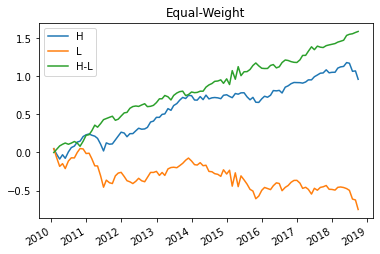

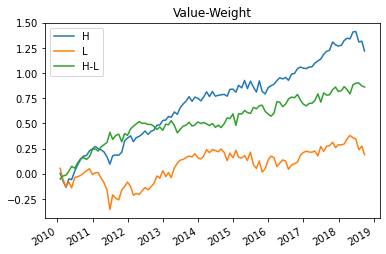

In [36]:
# Equal-weight
cumret = pd.DataFrame(0, index=test.date.unique(), columns=[])
cumret['H'] = np.log((1 + r_h_ew).cumprod())
cumret['L'] = np.log((1 + r_l_ew).cumprod())
cumret['H-L'] = np.log((1 + r_hl_ew).cumprod())

cumret.plot(title='Equal-Weight')

# Value-weight
cumret = pd.DataFrame(0, index=test.date.unique(), columns=[])
cumret['H'] = np.log((1 + r_h_vw).cumprod())
cumret['L'] = np.log((1 + r_l_vw).cumprod())
cumret['H-L'] = np.log((1 + r_hl_vw).cumprod())

cumret.plot(title='Value-Weight')

### XGBoost

In [37]:
from xgboost import XGBClassifier, callback
from sklearn.model_selection import train_test_split

In [38]:
callbacks = [callback.EarlyStopping(rounds=2, save_best=True)]
model = XGBClassifier(n_estimators=10, objective='multi:softprob', num_class=10, 
                      eval_metric='mlogloss', callbacks=callbacks, reg_alpha=0, reg_lambda=0)

x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

model.fit(x_train2, y_train2, eval_set=[(x_val, y_val)], verbose=True)


[0]	validation_0-mlogloss:2.02892
[1]	validation_0-mlogloss:1.89927
[2]	validation_0-mlogloss:1.81233
[3]	validation_0-mlogloss:1.74976
[4]	validation_0-mlogloss:1.70316
[5]	validation_0-mlogloss:1.66778
[6]	validation_0-mlogloss:1.64011
[7]	validation_0-mlogloss:1.61841
[8]	validation_0-mlogloss:1.60096
[9]	validation_0-mlogloss:1.58701


XGBClassifier(base_score=0.5, booster='gbtree',
              callbacks=[<xgboost.callback.EarlyStopping object at 0x000001EC3CEE7760>],
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_class=10, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, ...)

In [39]:
# evaluate the XGB model
# on train set
accuracy_train = model.score(x_train, y_train)
print(f'Train set accuracy = {accuracy_train}')

# on test set
accuracy_test = model.score(x_test, y_test)
print(f'Test set accuracy = {accuracy_test}')

Train set accuracy = 0.3794789546472393
Test set accuracy = 0.37719502295309215


### Portfolio returns

In [42]:
# 'H' and 'L' portfolio returns
r_h_ew = []; r_l_ew = []  # equal-weight 
r_h_vw = []; r_l_vw = []  # value-weight

# predict in each month during the test period
for m, test_m in test.groupby('date'):
    x_test_m = test_m[x_cols].values
    
    # Predict the return class
    y_pred = model.predict(x_test_m)
    test_m_h = test_m[y_pred == 0] # data of class 'overbought'
    test_m_l = test_m[y_pred == 9] # data of class 'oversold'
    
    rh = test_m_h['tgt_ret'] # returns of class 'overbought'
    rl = test_m_l['tgt_ret'] # returns of class 'oversold'

    # equal-weight
    # portfolio weights
    wh_ew = (1/len(rh) if len(rh) else 0) * np.ones_like(rh)
    wl_ew = (1/len(rl) if len(rl) else 0) * np.ones_like(rl)
    
    # portfolio return
    r_h_ew.append(np.matmul(wh_ew, rh))
    r_l_ew.append(np.matmul(wl_ew, rl))

    # value-weight
    # portfolio weights
    sizeh = np.exp(test_m_h['size'])
    sizel = np.exp(test_m_l['size'])
    wh_vw = sizeh/np.sum(sizeh)
    wl_vw = sizel/np.sum(sizel)

    # portfolio return
    r_h_vw.append(np.matmul(wh_vw, rh))
    r_l_vw.append(np.matmul(wl_vw, rl))
    

# Equal-weight long, short, and long-short portfolios
# list -> np.array
r_h_ew = np.array(r_h_ew)
r_l_ew = np.array(r_l_ew)

# long-short portfolio return
r_hl_ew = r_h_ew - r_l_ew 

# Value-weight long, short, and long-short portfolios
# list -> np.array
r_h_vw = np.array(r_h_vw)
r_l_vw = np.array(r_l_vw)

# long-short portfolio return
r_hl_vw = r_h_vw - r_l_vw

### Evaluate portfolio

In [43]:
# dataframe to store evaluation results
pftab = pd.DataFrame(0, index=['cum', 'mean', 'std', 'Sharpe', 'mdd'], columns=[])

pftab['EW_H'] = evaluate(r_h_ew)
pftab['EW_L'] = evaluate(r_l_ew)
pftab['EW_HL'] = evaluate(r_hl_ew)

pftab['VW_H'] = evaluate(r_h_vw)
pftab['VW_L'] = evaluate(r_l_vw)
pftab['VW_HL'] = evaluate(r_hl_vw)

pftab

,EW_H,EW_L,EW_HL,VW_H,VW_L,VW_HL
cum,1.753011,-0.566191,4.564713,1.721266,0.233752,0.821640
mean,0.126350,-0.077760,0.204110,0.128094,0.044417,0.083677
std,0.141600,0.184640,0.113077,0.161867,0.201113,0.172741
Sharpe,0.892308,-0.421144,1.805060,0.791358,0.220857,0.484408
mdd,-0.199916,-0.591598,-0.071664,-0.197673,-0.339371,-0.210895


### Cumulative return

<AxesSubplot:title={'center':'Value-Weight'}>

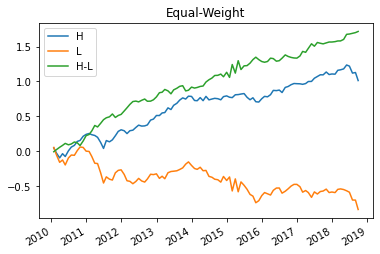

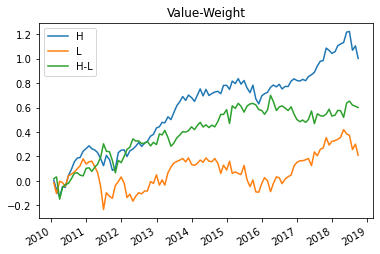

In [44]:
# Equal-weight
cumret = pd.DataFrame(0, index=test.date.unique(), columns=[])
cumret['H'] = np.log((1 + r_h_ew).cumprod())
cumret['L'] = np.log((1 + r_l_ew).cumprod())
cumret['H-L'] = np.log((1 + r_hl_ew).cumprod())

cumret.plot(title='Equal-Weight')

# Value-weight
cumret = pd.DataFrame(0, index=test.date.unique(), columns=[])
cumret['H'] = np.log((1 + r_h_vw).cumprod())
cumret['L'] = np.log((1 + r_l_vw).cumprod())
cumret['H-L'] = np.log((1 + r_hl_vw).cumprod())

cumret.plot(title='Value-Weight')